In [4]:
import pandas as pd

path="https://raw.githubusercontent.com/DeboraMandon/video_game_sales_analysis/main/vgsales.csv"
df=pd.read_csv(path, index_col=0)
df.head()

########## PART D

########## PART S

########## PART G

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
# TYPE DE VARIABLE
########## PART D
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB
None


In [6]:
# TAUX DE NA
########## PART D
print(df.isna().sum())
#pourcentage de valeur nulle pour la variable Year
Year_Na=(df['Year'].isna().sum())/(len(df['Year']))
Year_Na=Year_Na*100
print('Year',round(Year_Na,2),'%')

#pourcentage de valeur nulle pour la variable Publisher
Year_Na=(df['Publisher'].isna().sum())/(len(df['Publisher']))
Year_Na=Year_Na*100
print('Publisher',round(Year_Na,2),'%')

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
Year 1.63 %
Publisher 0.35 %


In [7]:
# DISTRIBUTION DES VALEURS
########## PART D
print(df.describe())
print(df.describe(include='O'))

               Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16327.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    2006.406443      0.264667      0.146652      0.077782      0.048063   
std        5.828981      0.816683      0.505351      0.309291      0.188588   
min     1980.000000      0.000000      0.000000      0.000000      0.000000   
25%     2003.000000      0.000000      0.000000      0.000000      0.000000   
50%     2007.000000      0.080000      0.020000      0.000000      0.010000   
75%     2010.000000      0.240000      0.110000      0.040000      0.040000   
max     2020.000000     41.490000     29.020000     10.220000     10.570000   

       Global_Sales  
count  16598.000000  
mean       0.537441  
std        1.555028  
min        0.010000  
25%        0.060000  
50%        0.170000  
75%        0.470000  
max       82.740000  
                               Name Platform   Genre        Publisher
count               

In [8]:
# ETENDUE DES VALEURS
########## PART D
print(df['Platform'].unique())
print(df['Year'].unique())
print(df['Genre'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2003. 1986. 2000.   nan 1995. 2016. 1991. 1981. 1987.
 1980. 1983. 2020. 2017.]
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [127]:
# RELATION ENTRE LES VALEURS
########## PART D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


   Platform  Count
0      2600    133
1       3DO      3
2       3DS    509
3        DC     52
4        DS   2163
5        GB     98
6       GBA    822
7        GC    556
8       GEN     27
9        GG      1
10      N64    319
11      NES     98
12       NG     12
13       PC    960
14     PCFX      1
15       PS   1196
16      PS2   2161
17      PS3   1329
18      PS4    336
19      PSP   1213
20      PSV    413
21      SAT    173
22      SCD      6
23     SNES    239
24     TG16      2
25       WS      6
26      Wii   1325
27     WiiU    143
28     X360   1265
29       XB    824
30     XOne    213


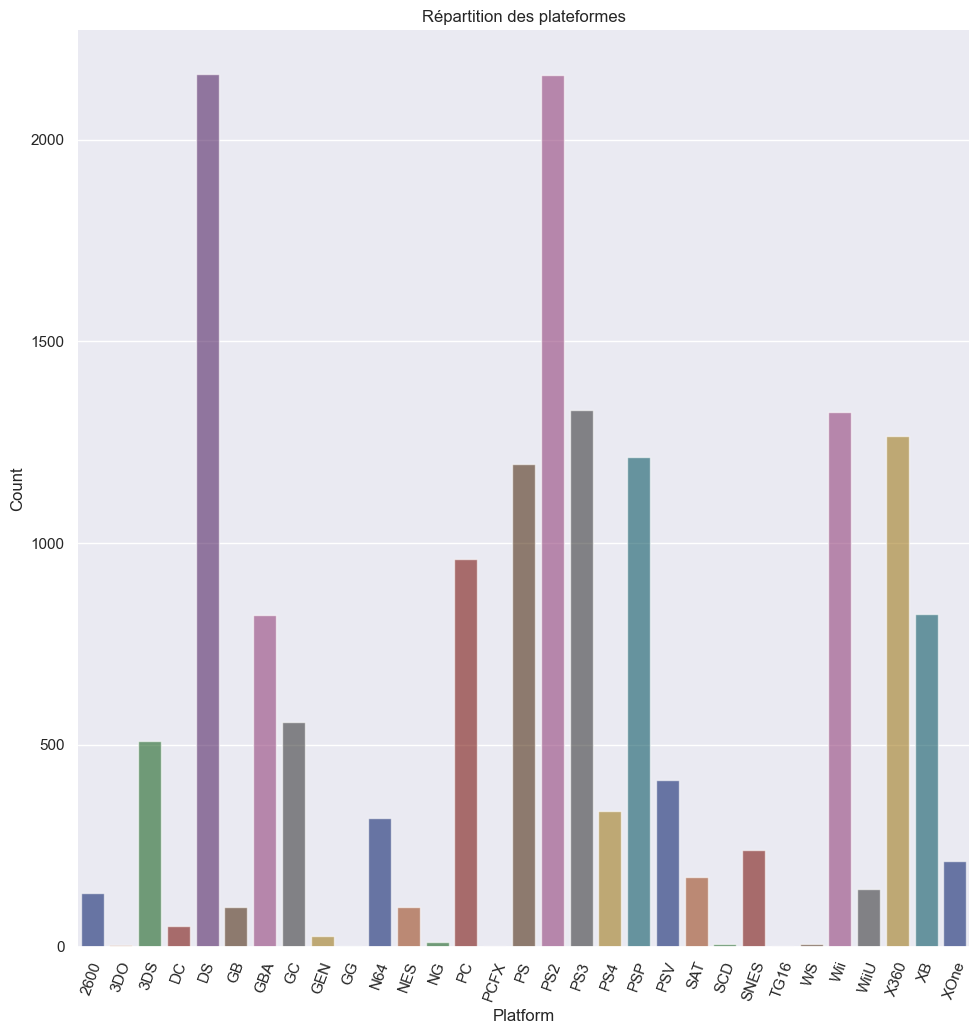

In [159]:
#PLATEFORMES

platform_count=df.groupby('Platform').agg('count')
platform_count.reset_index(inplace=True)
platform_count.drop(['Year', 'Genre','Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], axis=1, inplace=True)
platform_count=platform_count.rename(columns={'Platform':'Platform','Name':'Count'})
print(platform_count)

sns.set_theme(style="darkgrid")
g=sns.catplot(data=platform_count, kind="bar",x="Platform", y="Count", palette="dark", alpha=.6, height=10)
g.despine(left=True)
g.set_axis_labels("Platform", "Count")
g.tick_params(axis='x', rotation=70)
plt.title("Répartition des plateformes");

           Genre  Count
0         Action   3316
1      Adventure   1286
2       Fighting    848
3           Misc   1739
4       Platform    886
5         Puzzle    582
6         Racing   1249
7   Role-Playing   1488
8        Shooter   1310
9     Simulation    867
10        Sports   2346
11      Strategy    681


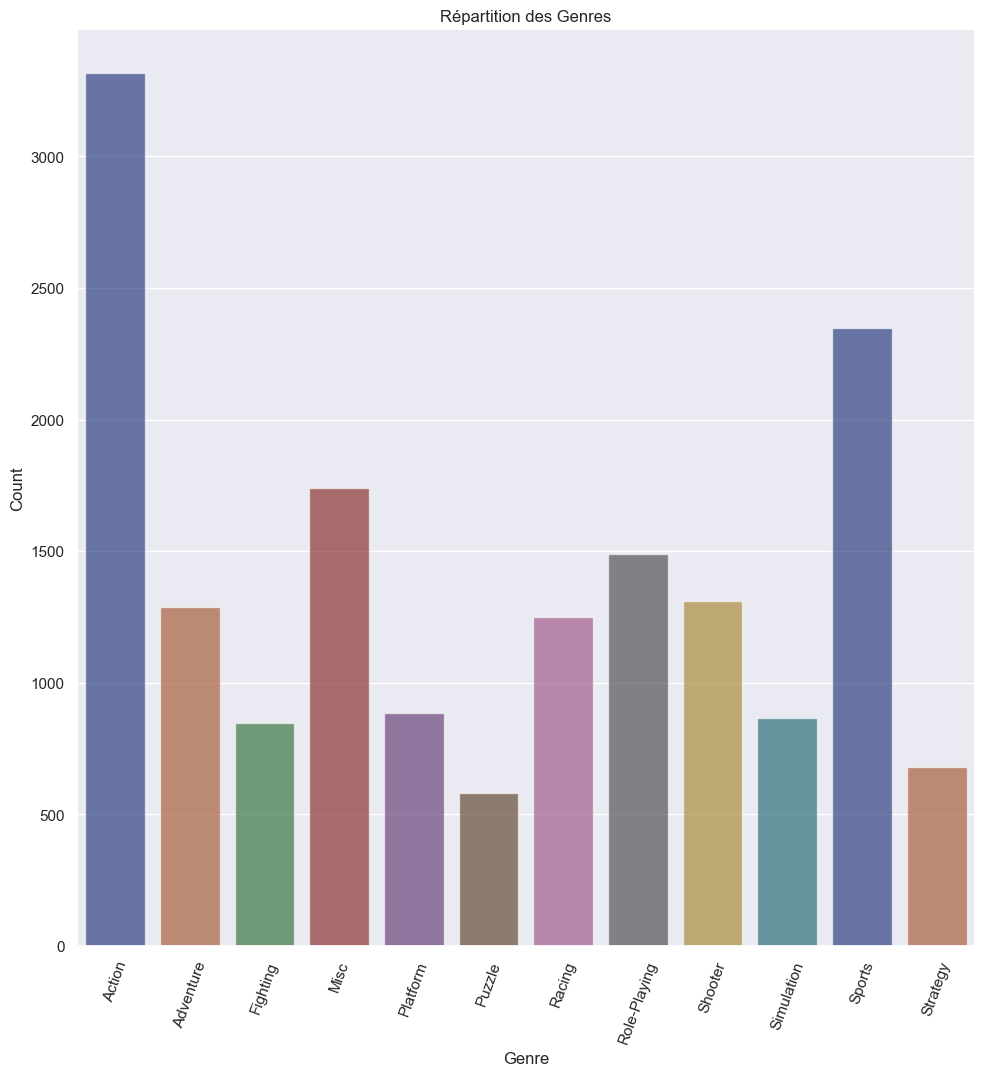

In [160]:
#GENRES

genre_count=df.groupby('Genre').agg('count')
genre_count.reset_index(inplace=True)
genre_count.drop(['Year', 'Platform','Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], axis=1, inplace=True)
genre_count=genre_count.rename(columns={'Genre':'Genre','Name':'Count'})
print(genre_count)

sns.set_theme(style="darkgrid")
g=sns.catplot(data=genre_count, kind="bar",x="Genre", y="Count", palette="dark", alpha=.6, height=10)
g.despine(left=True)
g.set_axis_labels("Genre", "Count")
g.tick_params(axis='x', rotation=70)
plt.title("Répartition des Genres");